In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
import tqdm
import json
from frbpa.utils import get_phase

In [2]:
with open('r3_data.json', 'r') as f:
    r3_data = json.load(f)
    
burst_dict = r3_data['bursts']

In [3]:
period = 16.35

In [4]:
phases_1 = []
phases_2 = []
mjds = []
for k in burst_dict.keys():
    phases_1 += list(get_phase(np.array(burst_dict[k]), period, ref_mjd=58369.30))
    phases_2 += list(get_phase(np.array(burst_dict[k]), period+0.01, ref_mjd=58369.30))
    mjds += burst_dict[k]

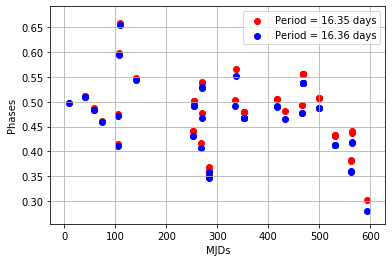

In [5]:
plt.scatter(np.array(mjds) - 58369.30, phases_1, color='r', label='Period = 16.35 days')
plt.scatter(np.array(mjds) - 58369.30, phases_2, color='b', label='Period = 16.36 days')
plt.xlabel('MJDs')
plt.ylabel('Phases')
plt.legend()
plt.grid()

Text(0.5, 0, 'phase')

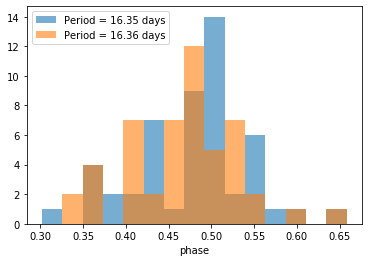

In [6]:
_, b, _ = plt.hist(phases_1, bins=15, alpha=0.6, label='Period = 16.35 days')
plt.hist(phases_2, bins=b, alpha=0.6, label='Period = 16.36 days')
plt.legend()
plt.xlabel('phase')